![331179_331179-amazon-cover_1680590667](331179_331179-amazon-cover_1680590667.jpg)


For Amazon, analyzing this data can help them understand which products are popular and which aren't and they can use that information to figure out how to price and market things better. For customers, having access to this data can help them decide what to buy - if they see that a product has good ratings and lots of positive reviews, they'll be more likely to buy it. 



In [107]:
import pandas as pd
df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Before we dive into the data analysis and visualization, we need to make sure our dataset is clean and properly formatted. This process is called data preparation, and it involves several steps:
- Data Inspection
- Data Cleaning
- Data Transformation
- Data Saving
By follow these steps, we can ensure that our data is clean, accurate, and ready for analysis.

In [108]:
df.shape

(1465, 16)

In [109]:
def check_missing_values(dataframe):
    return dataframe.isnull().sum()

print(check_missing_values(df))
df[df.rating_count.isnull()]


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [110]:
df.dropna(subset=['rating_count'], inplace = True)
print(check_missing_values(df))


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [111]:
# Check for duplicates
def check_duplicates(dataframe):
    return dataframe.duplicated().sum()

print(check_duplicates(df))

0


In [112]:
# Check data types
def check_data_types(dataframe):
    return dataframe.dtypes

print(check_data_types(df))

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


Some variables in the dataset may have an object data type, which mean they are strings. In order to perform numerical analysis on the variables, we need to convert them to numeric values.

In [113]:
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹','').str.replace(',', '').astype(float)
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹','').str.replace(',', '').astype(float)
df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '').astype(float)/100

# The rating column has a value with an incorrect character, so we will exclude the row to obtain a clean dataset
count = df['rating'].astype(str).str.contains('\|').sum()
df = df[df['rating'].apply(lambda x: '|' not in str(x))]
count = df['rating'].astype(str).str.contains('\|').sum()


In [114]:
df['rating'] = df['rating'].astype(str).replace(',', '').astype(float)
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(float)
print(check_data_types(df))

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
about_product           object
user_id                 object
user_name               object
review_id               object
review_title            object
review_content          object
img_link                object
product_link            object
dtype: object


Now that we have adjusted the data types, let's create one more column that could be interesting to have in our database, "rating_weighted", because it can be created as a way of considering not only the average rating but also the number of people who rated the product. This can help identify product with high customer satisfaction and many positive ratings compared to products with high average ratings but few raters.

In [115]:
df['rating_weighted'] = df['rating'] * df['rating_count']
df['sub_category'] = df['category'].astype(str).str.split('|').str[-1]
df['main_category'] = df['category'].astype(str).str.split('|').str[0]
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'rating_weighted',
       'sub_category', 'main_category'],
      dtype='object')

In [116]:
len(df)

1462

In [117]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,rating_weighted,sub_category,main_category
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,101929.8,USBCables,Computers&Accessories
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,43994.0,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,175976.0,USBCables,Computers&Accessories
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,30919.2,USBCables,Computers&Accessories
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,94363.0,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,396324.6,USBCables,Computers&Accessories
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,16905.0,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,71001.0,USBCables,Computers&Accessories


We will take a closer look at our data to understand how our products are distributed across categories, what the customer ratings look like and what customers are saying in their reviews.

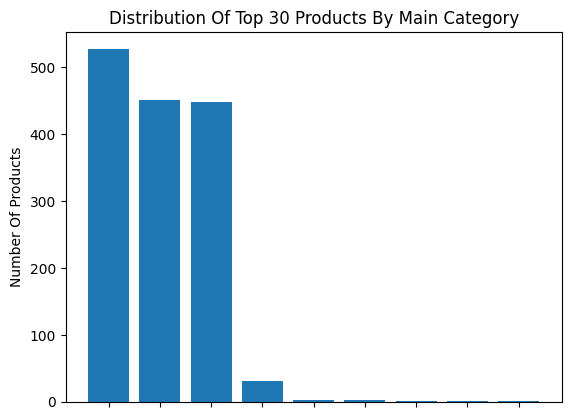

Top 30 main categories:
        Main Category  Number of Products
          Electronics                 526
Computers&Accessories                 451
         Home&Kitchen                 447
       OfficeProducts                  31
   MusicalInstruments                   2
      HomeImprovement                   2
           Toys&Games                   1
        Car&Motorbike                   1
  Health&PersonalCare                   1


In [118]:
import matplotlib.pyplot as plt

# Analyzing distribution of products by main category
main_category_counts = df['main_category'].value_counts()[:30]
plt.bar(range(len(main_category_counts)), main_category_counts.values)
plt.ylabel('Number Of Products')
plt.title('Distribution Of Top 30 Products By Main Category')
# Hide xlabel
plt.xticks(range(len(main_category_counts)), '')
plt.show()
#Top 30 main categories
top_main_categories = pd.DataFrame({'Main Category' : main_category_counts.index, 'Number of Products' : main_category_counts.values})
print('Top 30 main categories:')
print(top_main_categories.to_string(index = False))


Base on the results, we can gather the following insights:
- The top three main categories are Electronics, Computers&Accessories, Home&Kitchen. This shows that these categories are popular among customers.
- The number of products in the other main categories is quite low, indicating that these categories are not as popular as the top three.
- MusicalInstruments, HomeImprovement, Toys&Games, Car&Motobike, Health&PersonalCare have a very small number of products, which may suggest that these categories have less demand.
-> Understand the current market trends and identify potential opportunities for growth in specific categories.

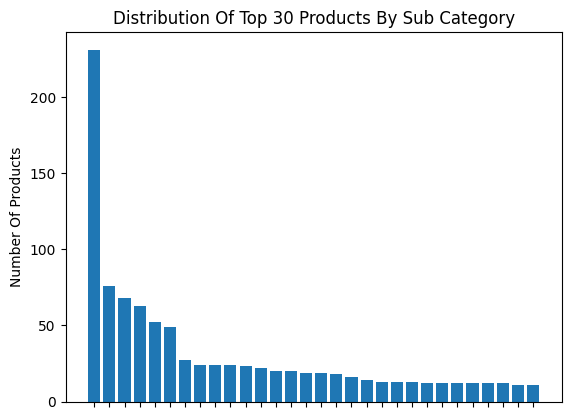

Top 30 sub categories:
            Sub Category  Number of Products
               USBCables                 231
            SmartWatches                  76
             Smartphones                  68
        SmartTelevisions                  63
                  In-Ear                  52
          RemoteControls                  49
           MixerGrinders                  27
              HDMICables                  24
                DryIrons                  24
                    Mice                  24
     InstantWaterHeaters                  23
             LintShavers                  22
              FanHeaters                  20
         ElectricHeaters                  20
         ElectricKettles                  19
            HandBlenders                  19
     WirelessUSBAdapters                  18
            WallChargers                  16
                Lapdesks                  14
          LaundryBaskets                  13
                 MicroSD        

In [119]:
# Analyzing distribution of products by last category
sub_category_counts = df['sub_category'].value_counts()[:30]
plt.bar(range(len(sub_category_counts)), sub_category_counts.values)
plt.ylabel('Number Of Products')
plt.title('Distribution Of Top 30 Products By Sub Category')
plt.xticks(range(len(sub_category_counts)), '')
plt.show()

# Top 30 Sub Categories
top_sub_categories = pd.DataFrame({'Sub Category' : sub_category_counts.index, 'Number of Products' : sub_category_counts.values})
print('Top 30 sub categories:')
print(top_sub_categories.to_string(index = False))

Base on the results, we can gather the following insights:
- The top 5 sub categories are USBCables, SmartWatches, Smartphones, smartTelevision and In-Ear. Among them, USBCables is the most prominent. These are the most popular sub categories and businesses could focus on providing products in these categories to attract customers.
- The data show that there is a diverse range of subcategories in the top 30, including kitchen appliances, home electronics, and personal accessories. This highlights the importance of offering a variety of products to cater to different customer needs and preferences.

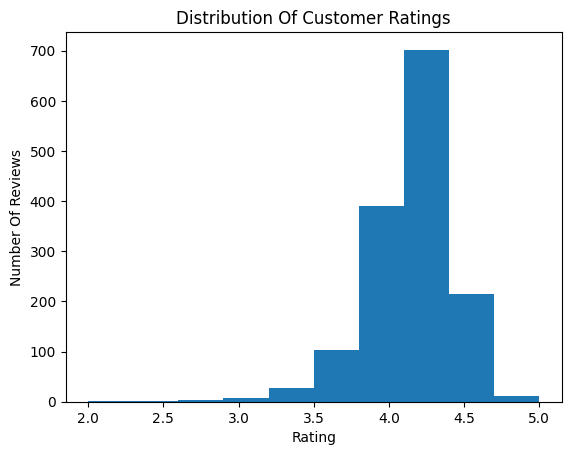

  Cluster  Number of Reviews
4     0-1                  0
3     1-2                  1
2     2-3                  8
1     3-4                525
0     4-5                928


In [120]:
# Analyzing the distribution of customer ratings using a histogram
plt.hist(df['rating'])
plt.xlabel('Rating')
plt.ylabel('Number Of Reviews')
plt.title('Distribution Of Customer Ratings')
plt.show()

# Create table with values per cluster
bins = [0, 1, 2, 3, 4, 5]
df['cluster'] = pd.cut(df['rating'], bins = bins, include_lowest = True, labels = ['0-1', '1-2', '2-3', '3-4', '4-5'])
table = df['cluster'].value_counts().reset_index().sort_values('index').rename(columns = {'index':'Cluster','cluster':'Number of Reviews'})
print(table)

- The majority of customer ratings fall within the 3-4 range and 4-5 range with a total of 1453 reviews.
- There are a small number of ratings fall within the 1-3 range with a total of 9 reviews.
- Overall, the distribution of customer ratings suggests that most customers are satisfied with the products, but there may be opportunities for inprovement to increase the number of positive ratings.


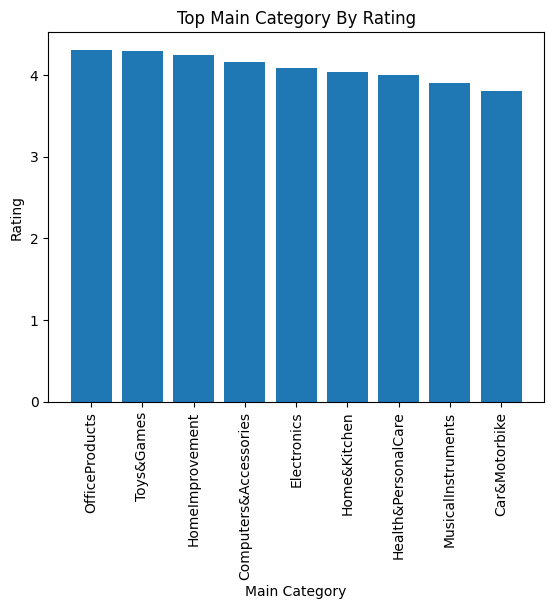

           main_category    rating
0         OfficeProducts  4.309677
1             Toys&Games  4.300000
2        HomeImprovement  4.250000
3  Computers&Accessories  4.155654
4            Electronics  4.081749
5           Home&Kitchen  4.040716
6    Health&PersonalCare  4.000000
7     MusicalInstruments  3.900000
8          Car&Motorbike  3.800000


In [121]:
# Calculate the top main categories
top = df.groupby(['main_category'])['rating'].mean().sort_values(ascending = False).head(10).reset_index()

plt.bar(top['main_category'], top['rating'])
plt.xlabel('Main Category')
plt.ylabel('Rating')
plt.title('Top Main Category By Rating')
plt.xticks(rotation = 90)
plt.show()

ranking = df.groupby('main_category')['rating'].mean().sort_values(ascending = False).reset_index()
print(ranking)


- The main categories with the highest ratings are OfficeProducts, Toys&Games, HomeImprovement, Computers&Accessories, Electronics and Home&Kitchen with ratings above 4.0.
- On the other hand, the main categories with lowest ratings are MusicalInstruments and Car&Motorbike with ratings below 4.0.

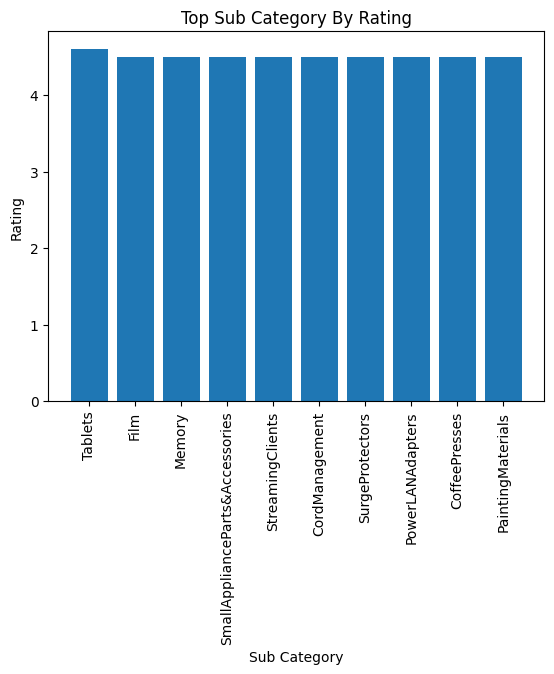

                        sub_category  rating
0                            Tablets     4.6
1                               Film     4.5
2                             Memory     4.5
3    SmallApplianceParts&Accessories     4.5
4                   StreamingClients     4.5
..                               ...     ...
202                   InkjetPrinters     3.6
203                       PCHeadsets     3.5
204                        3DGlasses     3.5
205                       DustCovers     3.4
206                 ElectricGrinders     3.3

[207 rows x 2 columns]


In [122]:
# Calculate the top sub categories
top = df.groupby(['sub_category'])['rating'].mean().sort_values(ascending = False).head(10).reset_index()

plt.bar(top['sub_category'], top['rating'])
plt.xlabel('Sub Category')
plt.ylabel('Rating')
plt.title('Top Sub Category By Rating')
plt.xticks(rotation = 90)
plt.show()
ranking = df.groupby('sub_category')['rating'].mean().sort_values(ascending = False).reset_index()
print(ranking)

- Tablets is at the top with a rating of 4.6.
- However, there are some sub categories at the bottom: DustCovers, ElectricGrinders.
-> Improve the quality of products and enhance the overall customer experience. It's important to keep track of customer feedback to identify areas for improvement and continue to meet their needs and expectations.

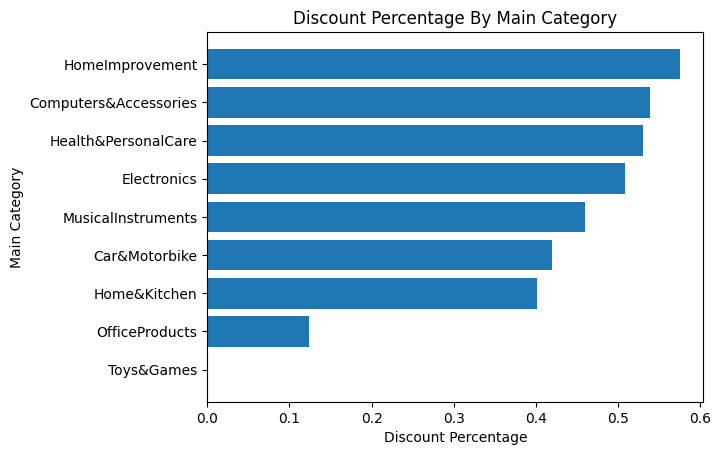

           Main_category  Mean Discount Percentage
0             Toys&Games                  0.000000
1         OfficeProducts                  0.123548
2           Home&Kitchen                  0.401745
3          Car&Motorbike                  0.420000
4     MusicalInstruments                  0.460000
5            Electronics                  0.508289
6    Health&PersonalCare                  0.530000
7  Computers&Accessories                  0.539202
8        HomeImprovement                  0.575000


In [123]:
# Sort the means in descending order
mean_discount_by_category = df.groupby('main_category')['discount_percentage'].mean()
mean_discount_by_category = mean_discount_by_category.sort_values(ascending = True)

# Create the horizontal bar chart
plt.barh(mean_discount_by_category.index, mean_discount_by_category.values)
plt.xlabel('Discount Percentage')
plt.ylabel('Main Category')
plt.title('Discount Percentage By Main Category')
plt.show()

table = pd.DataFrame({'Main_category' : mean_discount_by_category.index, 'Mean Discount Percentage' : mean_discount_by_category.values})
print(table)

The category with the lowest mean discount percentage is Toys&Games, with a value of 0.0. This may indicate that the demand for toys and games is high enough that retailers do not need to offer significant discounts to sell products in this category.
Home&Kitchen and Car&Motorbike have similar mean discount percentages, with values of 0.40 and 0.42, respectively. This suggests that there may be a similar level of competition and price sensitivity in these two categories.
The categories with the highest mean discount percentages are HomeImprovement, Computers&Accessories, and Heal&PersonalCare, with values of 0.58, 0.54, and 0.53, respectively. This may indicate that these categories are more price-sensitive, and retailers need to offer attractive discounts to compete effectively.
 It's also interesting to note that OfficeProducts and Electronics have mean discount percentages of 0.12 and 0.51, respectively, which are in between the categories with the lowest and highest mean discount percentages. This suggests that these categories may have some level of price sensitivity, but not to the same extent as HomeImprovement, Computers&Accessories, and Health&PersonalCare.

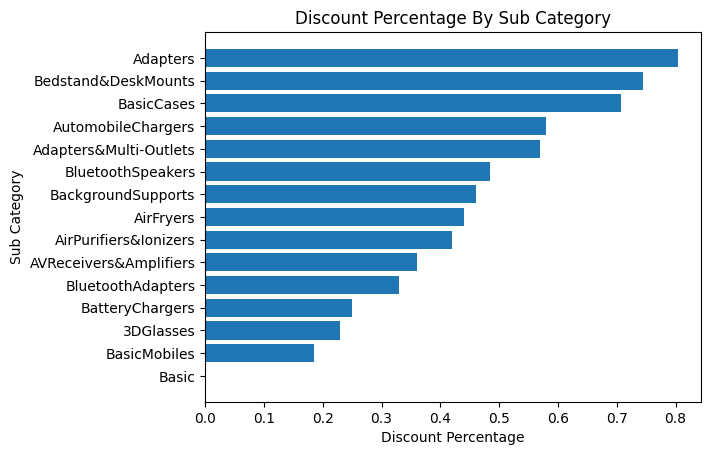

              Sub Category  Mean Discount Percentage
0                    Basic                  0.000000
1             BasicMobiles                  0.185556
2                3DGlasses                  0.230000
3          BatteryChargers                  0.250000
4        BluetoothAdapters                  0.330000
5   AVReceivers&Amplifiers                  0.360000
6    AirPurifiers&Ionizers                  0.420000
7                AirFryers                  0.440000
8       BackgroundSupports                  0.460000
9        BluetoothSpeakers                  0.485000
10  Adapters&Multi-Outlets                  0.570000
11      AutomobileChargers                  0.580000
12              BasicCases                  0.707500
13     Bedstand&DeskMounts                  0.745000
14                Adapters                  0.803333


In [124]:
# Sort the means in descending order
mean_discount_by_sub_category = df.groupby('sub_category')['discount_percentage'].mean().head(15)
mean_discount_by_sub_category = mean_discount_by_sub_category.sort_values(ascending = True)

# Create the horizontal bar chart
plt.barh(mean_discount_by_sub_category.index, mean_discount_by_sub_category.values)
plt.xlabel('Discount Percentage')
plt.ylabel('Sub Category')
plt.title('Discount Percentage By Sub Category')
plt.show()

table = pd.DataFrame({'Sub Category' : mean_discount_by_sub_category.index, 'Mean Discount Percentage' : mean_discount_by_sub_category.values})
print(table)

The subcategory with the lowest mean discount percentage is Basic, with a value of 0.0. This may indicate that basic products, which are typically low-cost and simple, do not need to be discounted heavily to attract buyers.
BatteryChargers, 3DGlasses, and BasicMobiles are examples of subcategories with moderate mean discount percentages, with values between 0.18 and 0.25. This suggests that these products may be somewhat price-sensitive, but not to the same extent as the products in the higher mean discount percentage subcategories.
BluetoothSpeakers, Bedstand&DeskMounts, and BasicCases are subcategories with high mean discount percentages, with values between 0.49 and 0.75. This suggests that these products may be more price-sensitive than others, and that retailers may need to offer attractive discounts to compete effectively in these subcategories.
The subcategory with the highest mean discount percentage is Adapters, with a value of 0.80. This indicates that the competition for these products is high, and that retailers must offer significant discounts to attract buyers.
Overall, this table shows that the mean discount percentage varies significantly across different subcategories, and that retailers need to carefully consider their pricing and discount strategies for each subcategory to effectively compete in the marketplace.

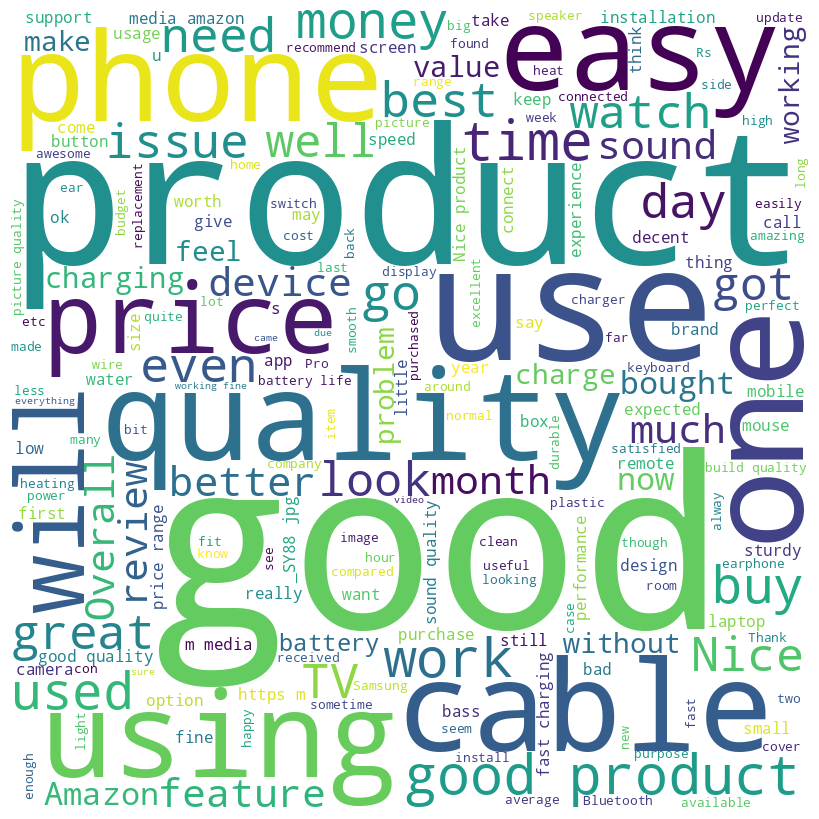

In [125]:
from wordcloud import WordCloud
# Analyzing the reviews by creating wordclouds or frequency tables of the most common words used in the reviews.
reviews_text = ''.join(df['review_content'].dropna().values)
wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate(reviews_text)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

The code generates a word cloud based on the reviews text in the dataset, allowing us to visually analyze the most common words used in the reviews. The larger the word in the cloud, the more frequently it appears in the reviews. This can provide insights into the overall sentiment of the customers, the most frequently mentioned product features or issues, and other important information that can help businesses improve their products and services. In the following example, you can see the word cloud for products with a rating greater than 4.